In [475]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [476]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [477]:
apps_df=pd.read_csv("Play Store Data.csv")
reviews_df=pd.read_csv("User Reviews.csv")

In [478]:
apps_df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7034,B.Z. Live-Ticker,NEWS_AND_MAGAZINES,NaN,114,7.7M,"10,000+",Free,0,Everyone,News & Magazines,"May 25, 2018",1.6,4.2 and up
314,Emmanuella Funny Videos 2018,COMICS,4.5,314,6.1M,"100,000+",Free,0,Everyone,Comics,"May 23, 2018",3.1.0,4.1 and up
10493,Cake Shop - Kids Cooking,FAMILY,4.3,30668,33M,"5,000,000+",Free,0,Everyone,Casual;Pretend Play,"July 16, 2018",2.1.3181,4.0.3 and up
1006,Reminder,EVENTS,4.5,7074,6.3M,"500,000+",Free,0,Everyone,Events,"June 25, 2018",1.57,4.1 and up
7553,CM FILE MANAGER,TOOLS,4.4,953790,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"August 5, 2018",Varies with device,Varies with device
1719,Block Puzzle,GAME,4.6,59854,7.8M,"5,000,000+",Free,0,Everyone,Puzzle,"March 6, 2018",2.9,2.3 and up
3676,Code,VIDEO_PLAYERS,4.4,239242,Varies with device,"10,000,000+",Free,0,Everyone,Video Players & Editors,"November 19, 2017",17.6,5.0 and up


In [479]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


- pd.read_csv()
- pd.read_excel()
- pd.read_sql()
- pd.read_json()
---
- df.isnull(): Missing values
- df.dropna(): Removes rows and cols that contain missing values
- df.fillna(): Fills missing values
---
- df.duplicated(): Identifies duplicates
- df.drop_duplicates(): Removes duplicate rows

# Data Cleaning

In [482]:
apps_df=apps_df.dropna(subset=["Rating"]) #Drop rows where Rating is Nan
for column in apps_df:
    apps_df[column].fillna(apps_df[column].mode()[0], inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df[apps_df["Rating"]<=5] #Filtering vals >5

reviews_df=reviews_df.dropna(subset=["Translated_Review"]) #Drop rows where Rating is Nan

C:\Users\rishi\AppData\Local\Temp\ipykernel_12056\3589635310.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [483]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#  Data Transformation

In [485]:
# Changing Data Types
# Converting Installs to numeric by removing commas and +
apps_df["Installs"]=apps_df["Installs"].str.replace("," ,"").str.replace("+" ,"") #1st were replacing cuz they r in str. Later when we convert them to int we cant use str.replace
apps_df["Installs"]=apps_df["Installs"].astype(int)

# Converting Price to numeric by removing $
apps_df["Price"]=apps_df["Price"].str.replace("$" ,"").str.replace("+" ,"").astype(float)


In [486]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [487]:
merged_df=pd.merge(apps_df, reviews_df, on="App", how="inner")

In [488]:
print(merged_df.sample(10))

                                App             Category  Rating  Reviews  \
58748        Facebook Pages Manager             BUSINESS     4.0  1279800   
4766   FastMeet: Chat, Dating, Love               DATING     4.2    22544   
3300                       Hangouts        COMMUNICATION     4.0  3419433   
15781              DIY Garden Ideas            LIFESTYLE     4.1     3309   
42374          GPS Status & Toolbox     TRAVEL_AND_LOCAL     4.5   149723   
48237               Financial Times   NEWS_AND_MAGAZINES     4.2    27104   
3837                          Gmail        COMMUNICATION     4.3  4604483   
31461                Bubble Shooter               FAMILY     4.4    59843   
48775   Czech Public Transport IDOS  MAPS_AND_NAVIGATION     4.3    26014   
35645     Couple - Relationship App               SOCIAL     4.0    33249   

                     Size    Installs  Type  Price Content Rating  \
58748  Varies with device    50000000  Free    0.0       Everyone   
4766          

In [489]:
def convert_size(size):
    if "M" in size:
        return float(size.replace("M","")) #if megabyte
    elif "K" in size:
        return float(size.replace("K",""))/1024 #if kilobyte
    else:
        return np.nan
apps_df["Size"]=apps_df["Size"].apply(convert_size)

The np.log function in NumPy computes the natural logarithm (base 𝑒 ) of a given input. It can be applied to scalars, arrays, or matrices. If the input is negative or zero, it will return NaN or throw an error since the logarithm of a non-positive number is undefined in the real number system.

In [491]:
apps_df["Reviews"]=apps_df["Reviews"].astype(int)

In [492]:
#Logarithmic
apps_df["Log_Installs"]=np.log(apps_df["Installs"])
apps_df["Log_Reviews"]=np.log(apps_df["Reviews"])

In [493]:
def rating_group(rating):
    if rating >=4:
        return "Top rated app"
    elif rating >=3:
        return "Above average"
    elif rating >=2:
        return "Average"    
    else:
        return "Below average"
apps_df["Rating_group"]=apps_df["Rating"].apply(rating_group)

In [494]:
#Revenue column
apps_df["Revenue"]=apps_df["Price"]*apps_df["Installs"]

# Sentiment Analysis NLP

In [496]:
sia = SentimentIntensityAnalyzer()

### Polarity Scores in SIA

- Positive: A measure of the positive sentiment in the text.
- Negative: A measure of the negative sentiment in the text.
- Neutral: A measure of the neutral sentiment.
- Compound: A normalized, weighted sum of all the sentiment scores. This score is useful for determining the overall sentiment of the text. A compound score closer to 1 means positive sentiment, closer to -1 means negative sentiment, and close to 0 means neutral sentiment.![image.png]

In [498]:
reviews_df["Sentiment_score"]=reviews_df["Translated_Review"].apply(lambda x:sia.polarity_scores(str(x))["compound"])
apps_df["Last Updated"]=pd.to_datetime(apps_df["Last Updated"], errors="coerce")
apps_df["Year"]=apps_df["Last Updated"].dt.year

### Static Visualization: Fixed images or plots, Non interactive
### Interactive Visualization: 

In [500]:
html_files_path = "./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [501]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated app,0.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,6.214608,1.945910,Top rated app,0.0,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,8.517193,3.637586,Top rated app,0.0,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,4.605170,1.386294,Top rated app,0.0,2018
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,6.907755,4.736198,Top rated app,0.0,2015


In [502]:
plot_containers=""

In [503]:
#Save each plotly fig to an HTML file
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs="inline")
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs="inline")

In [504]:
plot_width=400
plot_height=300
plot_bg_color="black"
text_color="white"
title_font={"size":16}
axis_font={"size":12},

In [505]:
#Figure 1
category_counts=apps_df["Category"].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={"x":"Category", "y":"Count"},
    title="Top 10 Categories on Google PlayStore",
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)

fig1.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig1, "Category Graph 1.html", "The top categories on Play Store are dominated by tools, entertainment and productivity apps")

In [506]:
#Figure 2
type_counts=apps_df["Type"].value_counts()
fig2=px.pie(
    names=type_counts.index,
    values=type_counts.values,
    title="App Type Distribution",
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)

fig2.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    margin=dict(l=10, r=10, t=30, b=10)
)
#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig2, "Type Graph 2.html", "Most apps on the PlayStore are free, indicating a strategy to attract users first and monitize through ads or in app purchases")

In [507]:
# Figure 3
fig3=px.histogram(
    apps_df,
    x="Rating",
    nbins=20,
    title="Rating Distribution",
    color_discrete_sequence=["#636EFA"],
    width=400,
    height=300
)

fig3.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig3, "Rating Graph 3.html", "Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users.")

In [508]:
#Figure 4
sentiment_counts=reviews_df["Sentiment_score"].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={"x":"Sentiment Score", "y":"Count"},
    title="Sentiment Distribution",
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)

fig4.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig4, "Sentiment Graph 4.html", "Sentiment in reviews show a mix of positive and negative feedback, with a slight lean towards positive sentiments.")

In [509]:
#Figure 5
installs_by_category=apps_df.groupby("Category")["Installs"].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation="h",
    labels={"x":"Installs", "y":"Category"},
    title="Installs by Category",
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)

fig5.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig5, "Installs Graph 5.html", "The category with the most installs are social and communication apps, reflecting their broad appeal and daily usage.")

In [510]:
#Figure 6
updates_per_year=apps_df["Last Updated"].dt.year.value_counts().sort_index()
fig6=px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={"x":"Year", "y":"No of updates"},
    title="Number of updates over the years",
    color_discrete_sequence=["#AB63FA"],
    width=400,
    height=300
)

fig6.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig6, "Updates Graph 6.html", "Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps.")

In [511]:
#Figure 7
revenue_by_category=apps_df.groupby("Category")["Revenue"].sum().nlargest(10)
fig7=px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    orientation="h",
    labels={"x":"Category", "y":"Revenue"},
    title="Revenue by Category",
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)

fig7.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig7, "Revenue Graph 7.html", "Categories such as Business and Productivity lead in revenue generation, indicating their monetization potential.")

In [512]:
#Figure 8
genre_counts=apps_df["Genres"].str.split(";", expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={"x":"Genre", "y":"Count"},
    title="Top Genres",
    color=genre_counts.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)

fig8.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig8, "Genre Graph 8.html", "Actual and Casual genres are the most common, reflecting users' preferences for engaging and easy-to-play games.")

In [513]:
#Figure 9
fig9=px.scatter(
    apps_df,
    x="Last Updated",
    y="Rating",
    title="Impact of Last Update on Rating",
    color="Type",
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)

fig9.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig9, "Update Graph 9.html", "The Scatter plot shows a weak correlation between Last Update and Ratings, suggesting that more frequent updates dont always result in better ratings.")

In [514]:
#Figure 10
fig10=px.box(
    apps_df,
    x="Type",
    y="Rating",
    title="Rating for Paid VS Free apps",
    color="Type",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)

fig10.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size":16},
    xaxis=dict(title_font={"size":12}),
    yaxis=dict(title_font={"size":12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color="white", width=1))))
save_plot_as_html(fig10, "Paid Free Graph 10.html", "Paid apps generally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for.")

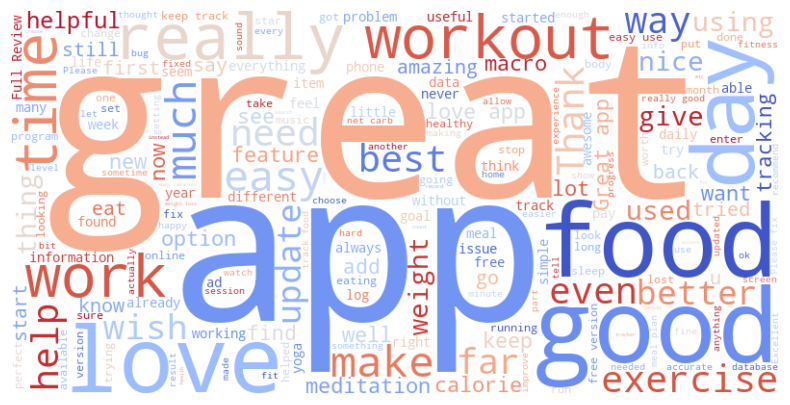

In [515]:
# TASK 1
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

reviews_df.columns = reviews_df.columns.str.strip()
apps_df.columns = apps_df.columns.str.strip()
health_apps = apps_df.loc[apps_df["Category"] == "HEALTH_AND_FITNESS", "App"].dropna()
health_reviews = reviews_df[reviews_df["App"].isin(health_apps)]
five_star_reviews = health_reviews.loc[health_reviews["Sentiment"] == "Positive", "Translated_Review"].dropna()
text = " ".join(five_star_reviews)
for app in health_apps.dropna():
    text = text.replace(app, "")

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=800, height=400, background_color="white", 
    stopwords=stopwords, colormap="coolwarm"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [516]:
#TASK 2
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import pytz

apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

apps_df = apps_df.dropna(subset=["Rating"])
for column in apps_df:
    apps_df[column].fillna(apps_df[column].mode(), inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df = apps_df[apps_df["Rating"] <= 5]
reviews_df = reviews_df.dropna(subset=["Translated_Review"])
apps_df["Installs"] = apps_df["Installs"].str.replace(",", "").str.replace("+", "").astype(int)
apps_df["Price"] = apps_df["Price"].str.replace("$", "").str.replace("+", "").astype(float)

merged_df = pd.merge(apps_df, reviews_df, on="App", how="inner")

def convert_size(size):
    if "M" in size:
        return float(size.replace("M",""))
    elif "K" in size:
        return float(size.replace("K",""))/1024
    else:
        return np.nan

apps_df["Size"] = apps_df["Size"].apply(convert_size)
apps_df["Reviews"] = apps_df["Reviews"].astype(int)

apps_df["Last Updated"] = pd.to_datetime(apps_df["Last Updated"], errors="coerce")
apps_df["Last Updated Month"] = apps_df["Last Updated"].dt.month

apps_df = apps_df[(apps_df["Last Updated Month"] == 1) & (apps_df["Size"] >= 10)]

top_categories = apps_df.groupby('Category')['Installs'].sum().nlargest(10).index
filtered_df = apps_df[apps_df['Category'].isin(top_categories)].copy()

category_stats = filtered_df.groupby('Category').agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Reviews', 'sum')
).reset_index()

category_stats = category_stats[category_stats['avg_rating'] >= 4.0]

ist_time = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist_time)
current_hour = now.hour

fig11 = go.Figure(data=[
    go.Bar(name='Average Rating', x=category_stats['Category'], y=category_stats['avg_rating'],
          marker_color='skyblue'),
    go.Bar(name='Total Reviews', x=category_stats['Category'], y=category_stats['total_reviews'],
          marker_color='lightcoral')
])

fig11.update_layout(title='Average Rating and Total Reviews for Top App Categories(January Updated, >=10M Size)',
                  xaxis_title='Category',
                  yaxis_title='Count/Rating',
                  barmode='group')
fig11.show()
save_plot_as_html(fig11, "Top 10 App Categories by Installs.html","These are top 10 App Categories by Installs")

else:
     print("The graph is available only between 3 PM and 5 PM IST.")

SyntaxError: invalid syntax (335831181.py, line 66)

In [ ]:
#TASK 3
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import pytz

apps_df = pd.read_csv("Play Store Data.csv")
reviews_df = pd.read_csv("User Reviews.csv")

apps_df = apps_df.dropna(subset=["Rating"])
for column in apps_df:
    apps_df[column].fillna(apps_df[column].mode(), inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df = apps_df[apps_df["Rating"] <= 5]
reviews_df = reviews_df.dropna(subset=["Translated_Review"])
apps_df["Installs"] = apps_df["Installs"].str.replace(",", "").str.replace("+", "").astype(int)
apps_df["Price"] = apps_df["Price"].str.replace("$", "").str.replace("+", "").astype(float)

merged_df = pd.merge(apps_df, reviews_df, on="App", how="inner")

def convert_size(size):
    if "M" in size:
        return float(size.replace("M",""))
    elif "K" in size:
        return float(size.replace("K",""))/1024
    else:
        return np.nan

apps_df["Size"] = apps_df["Size"].apply(convert_size)
apps_df["Reviews"] = apps_df["Reviews"].astype(int)

filtered_df = apps_df[(apps_df["Category"] == "GAME") & (apps_df["Rating"] > 3.5) & (apps_df["Installs"] > 50000)].copy()

ist_time = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist_time)
current_hour = now.hour

if 17 <= current_hour <= 19:
    fig12 = px.scatter(
        filtered_df,
        x="Size",
        y="Rating",
        size="Installs",
        title="App Size vs Rating for Games Category (Installs > 50k, Rating > 3.5)",
        labels={"Size": "App Size (MB)", "Rating": "Average Rating"},
        hover_name="App",
    )
    fig12.update_layout(
        plot_bgcolor="black",
        paper_bgcolor="black",
        font_color="white",
        title_font={"size":16},
        xaxis=dict(title_font={"size":12}),
        yaxis=dict(title_font={"size":12}),
        margin=dict(l=10, r=10, t=30, b=10)
    )
    fig12.show()
    save_plot_as_html(fig12, "App Size vs Rating for Games Category","These are top 10 App Categories by Installs")

else:
    print("The graph is available only between 5 PM and 7 PM IST.")

In [ ]:
plot_containers_split=plot_containers.split("</div>")

In [ ]:
if len(plot_containers_split)>1:
    final_plot=plot_containers_split[-2]+"</div>"
else:
    final_plot=plot_containers

In [ ]:
dashboard_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444;
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            padding: 20px;
        }}
        .plot_container {{
            border: 2px solid #555;
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0, 0, 0, 0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot_container:hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, "_blank");
                }}
        </script>
    </head>
    <body>
        <div class="header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """

In [ ]:
final_html=dashboard_html.format(plots=plot_containers, plot_width=plot_width, plot_height=plot_height)

In [ ]:
dashboard_path=os.path.join(html_files_path,"web_page.html")

In [ ]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [ ]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))